In [1]:
# Common
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import random

# Data Splite
from sklearn.model_selection import train_test_split

# Models 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics


# Plot
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
IMG_WIDTH=28
IMG_HEIGHT=28
img_folder=r'C:\Users\16645\Desktop\HWR\monkbrill2'

In [5]:
def create_dataset(img_folder):
   
    img_data_array= []
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, -1)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'C:\Users\16645\Desktop\HWR\monkbrill2')

In [6]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
x = np.array(img_data, np.float32)
from keras.utils.np_utils import *
y = to_categorical(target_val)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.9) #90/10 split

In [33]:
from tensorflow import keras
source_model = keras.models.load_model(r"C:\Users\16645\Desktop\HWR")
source_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_2 (Averag  (None, 13, 13, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [34]:
model = Sequential()
for layer in source_model.layers[:-2]:  # remove the last 2 layers
   model.add(layer)
model.summary()
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=27, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.Adam(1e-2), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_2 (Averag  (None, 13, 13, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_2 (Averag  (None, 13, 13, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [36]:
# model = Sequential()

# model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
# model.add(AveragePooling2D())

# model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
# model.add(AveragePooling2D())

# model.add(Flatten())

# model.add(Dense(units=120, activation='relu'))

# model.add(Dense(units=84, activation='relu'))

# model.add(Dense(units=27, activation = 'softmax'))
# model.summary()
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(x = X_train, y = y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test),verbose = 2 )

Epoch 1/20
39/39 - 1s - loss: 2.2349 - accuracy: 0.4574 - val_loss: 0.7709 - val_accuracy: 0.8014 - 700ms/epoch - 18ms/step
Epoch 2/20
39/39 - 0s - loss: 0.6133 - accuracy: 0.8385 - val_loss: 0.4353 - val_accuracy: 0.8809 - 296ms/epoch - 8ms/step
Epoch 3/20
39/39 - 0s - loss: 0.3795 - accuracy: 0.8904 - val_loss: 0.3869 - val_accuracy: 0.8827 - 301ms/epoch - 8ms/step
Epoch 4/20
39/39 - 0s - loss: 0.2813 - accuracy: 0.9119 - val_loss: 0.3431 - val_accuracy: 0.9079 - 307ms/epoch - 8ms/step
Epoch 5/20
39/39 - 0s - loss: 0.2096 - accuracy: 0.9312 - val_loss: 0.3004 - val_accuracy: 0.9079 - 309ms/epoch - 8ms/step
Epoch 6/20
39/39 - 0s - loss: 0.1990 - accuracy: 0.9348 - val_loss: 0.3505 - val_accuracy: 0.9043 - 310ms/epoch - 8ms/step
Epoch 7/20
39/39 - 0s - loss: 0.1605 - accuracy: 0.9460 - val_loss: 0.2846 - val_accuracy: 0.9170 - 310ms/epoch - 8ms/step
Epoch 8/20
39/39 - 0s - loss: 0.1313 - accuracy: 0.9540 - val_loss: 0.3140 - val_accuracy: 0.9188 - 310ms/epoch - 8ms/step
Epoch 9/20
39/3

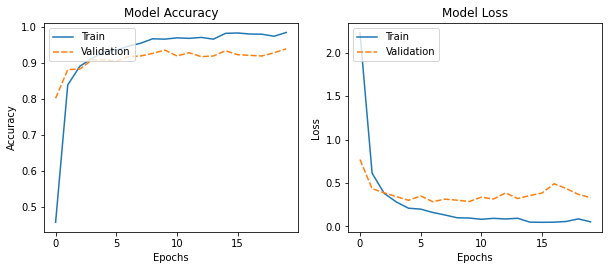

In [38]:
#Get Train/Validation -> accuracy and loss values for previous model trained
accuracies = [model.history.history['accuracy'],model.history.history['val_accuracy']]
losses = [model.history.history['loss'],model.history.history['val_loss']]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
sns.lineplot(data=accuracies, ax=ax1)
sns.lineplot(data=losses, ax=ax2)
ax1.set(title = 'Model Accuracy', xlabel='Epochs', ylabel='Accuracy')
ax2.set(title = 'Model Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax2.legend(['Train', 'Validation'], loc='upper left')
fig.subplots_adjust(top=0.85)

In [39]:
# Model accuracy on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")
print(y_test)

18/18 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.9386
Test loss: 0.3316732347011566
Test accuracy: 0.9386281371116638
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
preds = model.predict(X_test)
#Convert probabilities to class labels
pred_classes = tf.argmax(preds, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

In [41]:
print(pred_classes)
print(y_test_classes)

tf.Tensor(
[19  1 21 12 18  0  6 20 19 19  6 18 20 18  2  0 20  7 18 10  6 16  2  6
  0 20  0  0 10 11  2  5  0 23  7 20 11  4  9 18  1  6  0  0  5  4  4 16
  2 16 20  1 20 13  5 18  2  5 26 11 17  1 23  9  5  2  2  6  5 20 16  5
 11 19  4 11  0 16 19 10  1 21 17 16 21 16  2 14 10  0  4 11 16  4 19 11
 21 24 16 20 19 12 20  4 11  2  6 20 11 11  9 11  2 11  0  6  4  4 23  5
 21 11  9 16 21 10  1 16  0 18  9  6 23  9 20  2 18 23 17 18  9 10  5 20
 12 18 19 24 13  7 24  9 19  6  7  9 11  5  0 19  4 13  9  7 19 23  1 18
 18 18  1  0 20 18  4  0 19 10  0 11  0 10 19  0  4 23 12  7 10  0  5  5
  4 19 10 10 20 12  5 13  0  4 23  6  6  7 13 25 19 21  2  7  0 18 13 19
 21  5 20 14 21  5  0  2  4  6  0 18 24 21 18 18 19 19  4 19 12  4  5  9
  0  6 21 19 18  6  0  9  2  6 16 10 23  0 21  5 11  1 23  5 13  4 21 24
 11 17 13 13  6 23 19 13 22 11 22 11  2  4  2 11  5 11  5  6 24 12 16 11
 20 13 21  0  4 24 24 23  2  9  7  5  1  2  9 13  2 11  0 20  6  4 24  1
  0 13 23  7  4 19  0 10  1 21  7  2  5 

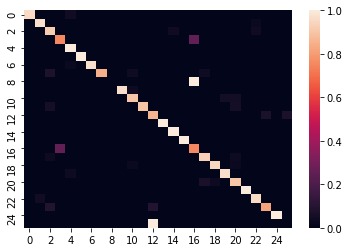

In [42]:
#Plot confusion Matrix
cm = confusion_matrix(y_test_classes, pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
f = sns.heatmap(cm, annot=False, fmt='.2f')

In [43]:
s1 = f.get_figure()
s1.savefig('HeatMap.jpg',dpi=100)